# 1. 드라이브 마운트, 모듈 설치, 한글폰트 설정
구글코랩 런타임 연결 끊김 방지  
https://teddylee777.github.io/colab/google-colab-%EB%9F%B0%ED%83%80%EC%9E%84-%EC%97%B0%EA%B2%B0%EB%81%8A%EA%B9%80%EB%B0%A9%EC%A7%80

In [ ]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import output

# !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
!cp "/content/drive/MyDrive/TAVE_빅콘테스트/제출데이터/RAW_DATA.zip" "data.zip"  ## 파일경로 예시

# data.zip을 현재 디렉터리에 압축해제
!unzip "data.zip"

Archive:  data.zip
외부데이터/USD_CAD 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_CAD ыВ┤ьЧн.csv),
         continuing with "central" filename version
  inflating: 외부데이터/USD_CAD 내역.csv  
외부데이터/USD_CLP 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_CLP ыВ┤ьЧн.csv),
         continuing with "central" filename version
  inflating: 외부데이터/USD_CLP 내역.csv  
외부데이터/USD_CNH 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_CNH ыВ┤ьЧн.csv),
         continuing with "central" filename version
  inflating: 외부데이터/USD_CNH 내역.csv  
외부데이터/USD_GBP 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_GBP ыВ┤ьЧн.csv),
         continuing with "central" filename version
  inflating: 외부데이터/USD_GBP 내역.csv  
외부데이터/USD_KRW 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_KRW ыВ┤ьЧн.csv),
         continuing with "central" filename version
  inflating: 외부데이터/USD_KRW 내역.csv  
외부데이터/USD_MYR 내역.csv:  mismatching "local" filename (ьЩ╕ы╢АыН░ьЭ┤эД░/USD_MYR ыВ┤ьЧн.csv),
 

In [ ]:
## 한글폰트 꺠짐현상 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install sktime ##시계열 train, test 분리할때 사용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,498 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

# 런타임 재시작하기

# 2. 모듈 및 데이터불러오기

In [ ]:
## 기본적인 모듈
import pandas as pd
import warnings ; warnings.filterwarnings(action='ignore') 
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm ## 진행상황 표시

## 시각화 및 폰트 지정할때 사용
import matplotlib.pyplot as plt ; plt.rc('font', family='NanumBarunGothic',size=20) ## 기본 시각화
import seaborn as sns ## 기본 시각화
from sklearn.metrics import silhouette_samples, silhouette_score  # 실루엣 계수 시각화
from sklearn.preprocessing import LabelEncoder ## 클러스터링 할때 사용
from sklearn.cluster import KMeans ## 클러스터링

## 모델링 할때 사용
from sktime.forecasting.model_selection import temporal_train_test_split ## 시계열 train, test 나눌때 사용
import xgboost as xgb ## 클러스터링 예측할떄 사용
from xgboost import XGBRegressor ## 가격 예측할때 사용
from sklearn.metrics import mean_squared_error ## mse 계산할떄 사용

In [ ]:
## 데이터 경로 지정
TRAIN_PATH_2015_2019 = './제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx' ## 2015년 ~ 2019년 제공 데이터
TRAIN_PATH_2020 = './제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_자율평가데이터.xlsx' ## 2020년 제공 데이터
TARGET_PATH_2021 = './제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_평가데이터_update_210831.xlsx' ## 2021년 평가데이터

## 2015년 ~ 2020년 학습 데이터 불러오기
train_full_data=pd.DataFrame()
train_data_2015_2019=pd.read_excel(TRAIN_PATH_2015_2019)
train_data_2020=pd.read_excel(TRAIN_PATH_2020)

## 데이터 연결
train_full_data=pd.concat([train_data_2015_2019,train_data_2020])
train_full_data.reset_index(drop=True,inplace=True)

# 3. 제공 데이터 전처리
실루엣 계수 및 시각화를 이용해서 상세 어종별 최적 군집 선택

In [ ]:
## 상세어종이 오징어, 연어, 흰다리 새우인 데이터만 보기
train_full_data=train_full_data[train_full_data['P_NAME'].isin(['오징어','연어','흰다리새우'])] ## 오징어, 연어, 흰다리새우만 추출


## 필요없는 변수들 제거
## P_TYPE : 모두 같아서 제거함
## CATEGORY_1, CATEGORY_2 : 원하는 제품의 경우 모든 내용이 같으므로 제거함
## CTRY_2 : 제조국과 판매국이 같은경우가 약 97%정도이므로 국가 정보변수 제거 해도 큰 영향 없을거라 판단
train_full_data.drop(['P_TYPE','CTRY_2','CATEGORY_1','CATEGORY_2'],axis=1,inplace=True)


## 제품이 가격에 큰 영향을 줄것이라 판단하여 제품을 따로 분류하고, 모델링을 진행할 것이기 때문에 제품별로 데이터를 정의함
train_data_squid=train_full_data[train_full_data['P_NAME']=='오징어'] ## 오징어 제품
train_data_salmon=train_full_data[train_full_data['P_NAME']=='연어'] ## 연어 제품
train_data_white_shrimp=train_full_data[train_full_data['P_NAME']=='흰다리새우'] ## 흰다리새우


## 제품별 새로운 파생변수 생성 (제조국_수입용도_수입형태)
## 제조국, 수입용도, 수입형태 모든 조합별 파생변수를 만들기에는 데이터에 비해 변수가 많이 생길것을 우려하여 군집화진행
for input_p_name in ['train_data_squid','train_data_salmon','train_data_white_shrimp']:
    globals() [input_p_name]['ctry_purpose_import_type']=globals() [input_p_name].apply(lambda x : x['CTRY_1']+'_'+x['P_PURPOSE']+'_'+x['P_IMPORT_TYPE'],axis=1) ## 제조국_수입용도_수입형태

In [ ]:
## 실루엣 계수 사용
## 실루엣 계수 - 실루엣 계수란 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타내는 계수
## 시각화 해석 방법 1 - 계수가 1에 가까울수록 다른 군집과 거리가 멀다는 것을 의미
## 시각화 해석 방법 2 - 평균값에 비해 계수가 떨어지는 군집이 존재하면 안됨

def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함\n",
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 \n",
    fig, axs = plt.subplots(figsize=(10*n_cols, 10), nrows=1, ncols=n_cols)
    
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화\n",
    for ind, n_cluster in enumerate(cluster_lists):
    
       # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. \n",
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
    
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
    
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+ 
                           'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks\n",
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
           ith_cluster_sil_values = sil_values[cluster_labels==i]
           ith_cluster_sil_values.sort()

           size_cluster_i = ith_cluster_sil_values.shape[0]
           y_upper = y_lower + size_cluster_i
    
           color = cm.nipy_spectral(float(i) / n_cluster)
           axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)
           axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
           y_lower = y_upper + 10
    
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
## 실루엣 계수 사용을 위해 라벨인코딩
le = LabelEncoder()
train_data_squid['sil_squid'] = le.fit_transform(train_data_squid['ctry_purpose_import_type'].values)

## 불필요한 열 제거
train_data_squid_sil = train_data_squid.drop(columns=['REG_DATE', 'CTRY_1', 'P_PURPOSE', 'P_NAME', 'P_IMPORT_TYPE','ctry_purpose_import_type'])

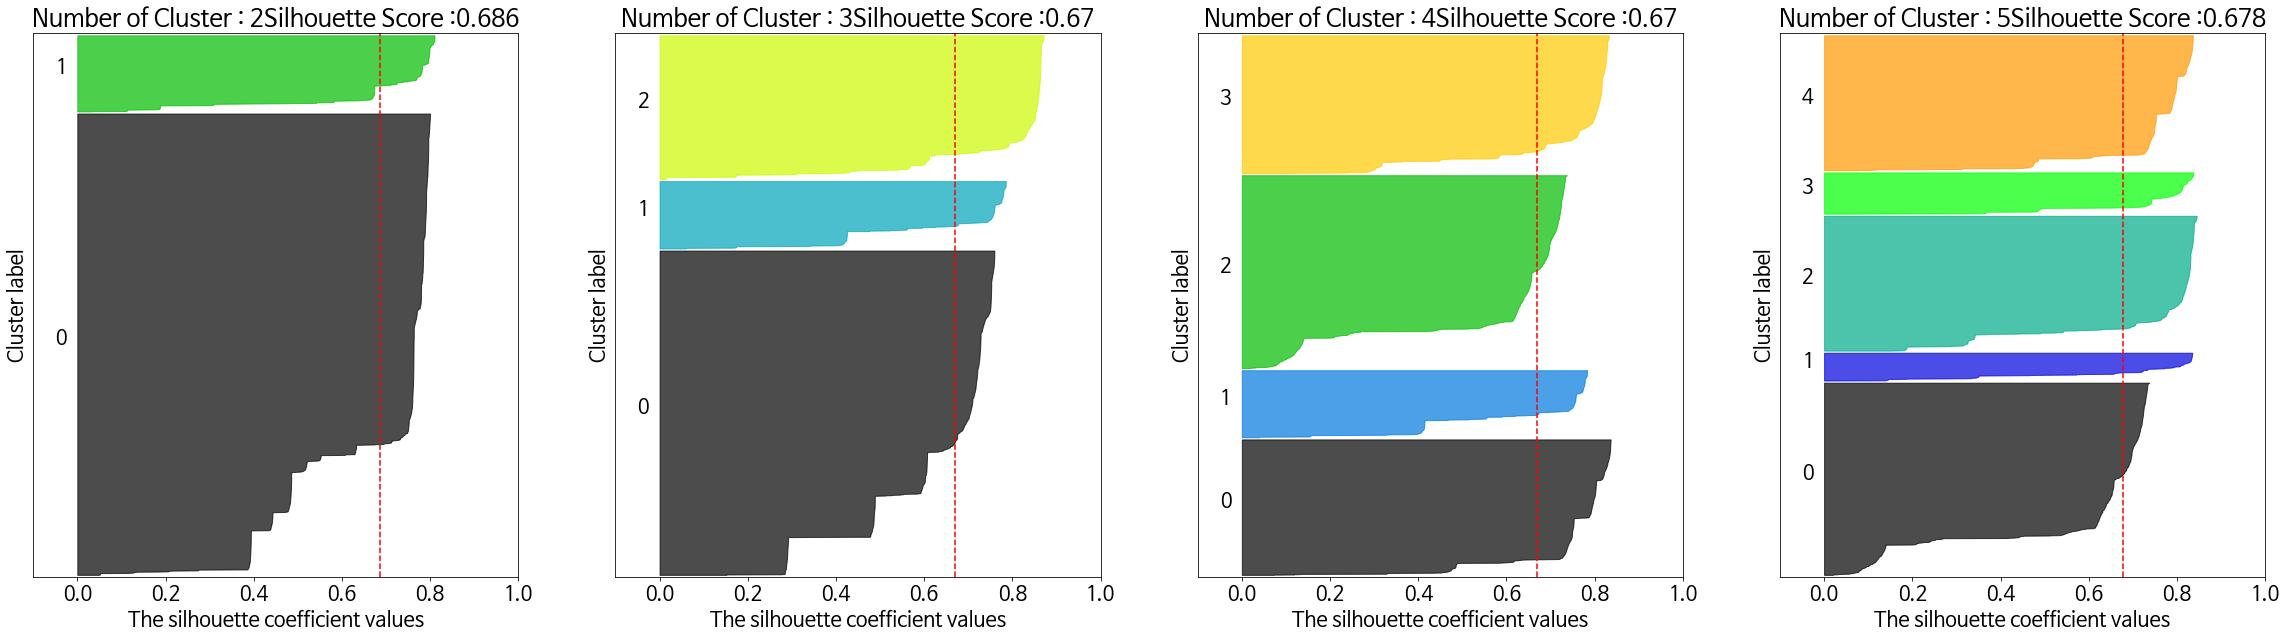

In [ ]:
## 실루엣 계수 시각화
## 해석 결과 : 오징어의 경우 클러스터 4개가 최적이라 판단
visualize_silhouette([2,3,4,5],train_data_squid_sil)

In [ ]:
## 군집화
## 날짜 및 파생변수(제조국_수입용도_수입형태)별 평균 금액 이용
def kmeans_data_squid(input_data):
    df_C_P_I = input_data.groupby(['ctry_purpose_import_type','REG_DATE'])['P_PRICE'].mean().reset_index().pivot('ctry_purpose_import_type','REG_DATE','P_PRICE').reset_index() ## 파생변수별 평균
    for i in range(len(df_C_P_I)):
        # 날짜별 평균 금액에 대해 scaling 하여 군집화
        df_C_P_I.iloc[i,1:] = (df_C_P_I.iloc[i,1:] - df_C_P_I.iloc[i,1:].mean())/df_C_P_I.iloc[i,1:].std() ##   (파생변수별 평균 값-파생변수 전체 날짜 평균)/파생변수 평균의 표준편차로 스케일링
    df_C_P_I.fillna(0,inplace=True)
    kmeans = KMeans(n_clusters=4, random_state = 7857)
    km_cluster = kmeans.fit_predict(df_C_P_I.iloc[:,1:])
    
    df_C_P_I_clust = df_C_P_I.copy()
    df_C_P_I_clust['km_cluster_C_P_I'] = km_cluster

    input_data=input_data.merge(df_C_P_I_clust[['ctry_purpose_import_type','km_cluster_C_P_I']],on='ctry_purpose_import_type', how='left')

    return input_data


In [ ]:
## 오징어 kmeans 실행
train_data_squid=kmeans_data_squid(train_data_squid) 

## 오징어 시각화 준비
train_data_squid_cluster=train_data_squid.groupby(['REG_DATE','km_cluster_C_P_I'])['P_PRICE'].mean().reset_index()
train_data_squid_cluster.index=train_data_squid_cluster['REG_DATE']

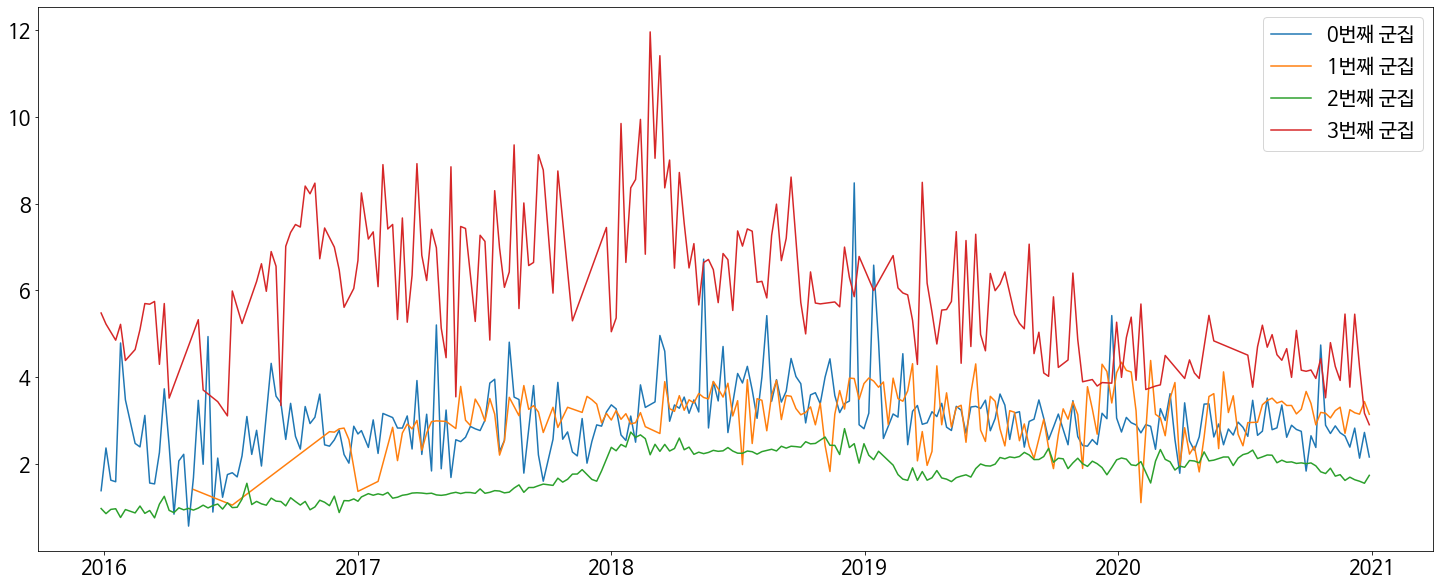

In [ ]:
## 군집별, 날짜별 평균 금액
fig = plt.figure(figsize = (25, 10))

plt.plot(train_data_squid_cluster[train_data_squid_cluster['km_cluster_C_P_I']==0]['P_PRICE'],label='0번째 군집')
plt.plot(train_data_squid_cluster[train_data_squid_cluster['km_cluster_C_P_I']==1]['P_PRICE'],label='1번째 군집')
plt.plot(train_data_squid_cluster[train_data_squid_cluster['km_cluster_C_P_I']==2]['P_PRICE'],label='2번째 군집')
plt.plot(train_data_squid_cluster[train_data_squid_cluster['km_cluster_C_P_I']==3]['P_PRICE'],label='3번째 군집')

plt.legend(loc='best')
plt.show()

연어 실루엣 검증

In [ ]:
## 실루엣 계수 사용을 위해 라벨인코딩
train_data_salmon['sil_squid'] = le.fit_transform(train_data_salmon['ctry_purpose_import_type'].values)

## 불필요한 열 제거
train_data_salmon_sil = train_data_salmon.drop(columns=['REG_DATE', 'CTRY_1', 'P_PURPOSE', 'P_NAME', 'P_IMPORT_TYPE','ctry_purpose_import_type'])

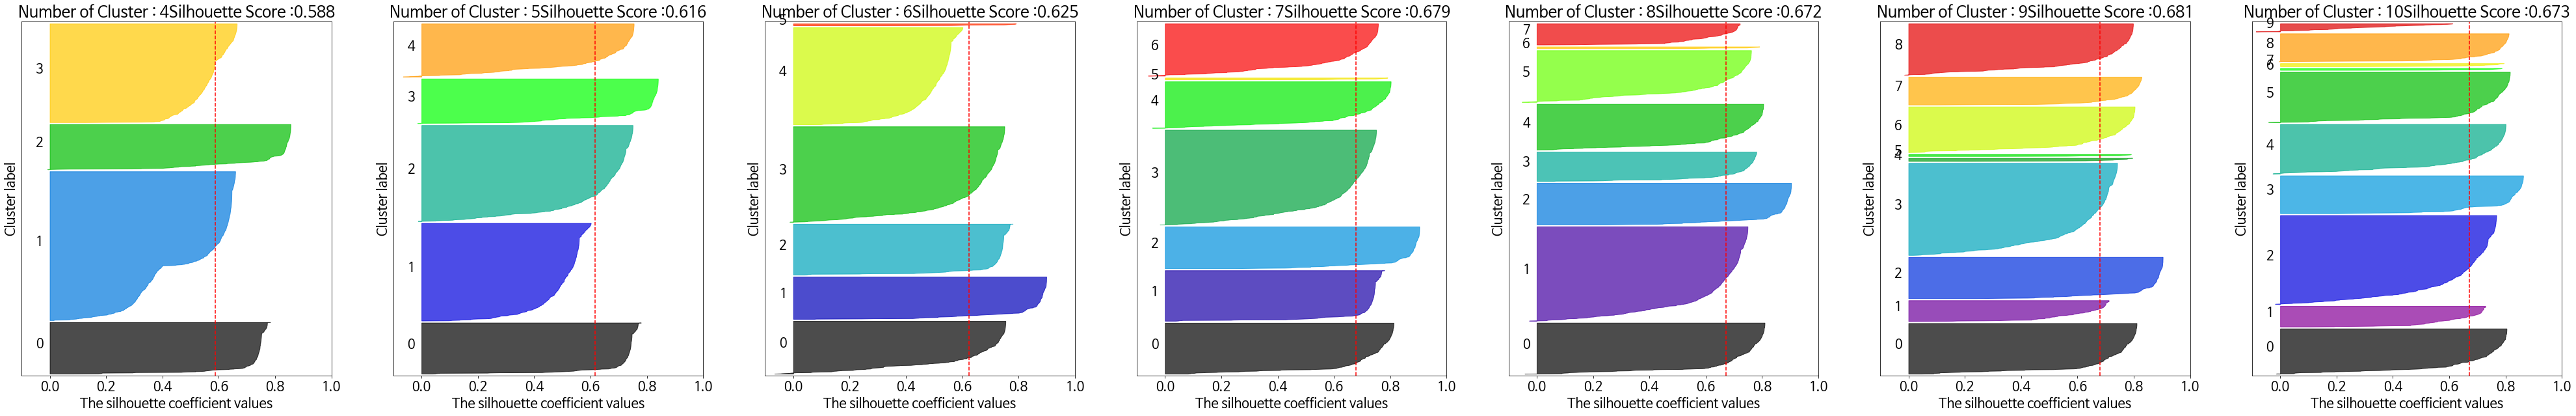

In [ ]:
# 실루엣 계수 시각화
# 연어 최적 클러스터 개수는 4개
# 5,6 클러스터로 군집화 하였을때 실루엣 계수는 높지만 평균값(빨간선)에 못미치는 군집이 존재

visualize_silhouette([4,5,6,7,8,9,10],train_data_salmon_sil)

In [ ]:
## 군집화
def kmeans_data_salmon(input_data):
    df_C_P_I = input_data.groupby(['ctry_purpose_import_type','REG_DATE'])['P_PRICE'].mean().reset_index().pivot('ctry_purpose_import_type','REG_DATE','P_PRICE').reset_index()
    for i in range(len(df_C_P_I)):
        df_C_P_I.iloc[i,1:] = (df_C_P_I.iloc[i,1:] - df_C_P_I.iloc[i,1:].mean())/df_C_P_I.iloc[i,1:].std() 
    df_C_P_I.fillna(0,inplace=True)
    kmeans = KMeans(n_clusters=4, random_state = 7857)
    km_cluster = kmeans.fit_predict(df_C_P_I.iloc[:,1:])
    
    df_C_P_I_clust = df_C_P_I.copy()
    df_C_P_I_clust['km_cluster_C_P_I'] = km_cluster

    input_data=input_data.merge(df_C_P_I_clust[['ctry_purpose_import_type','km_cluster_C_P_I']],on='ctry_purpose_import_type', how='left')

    return input_data


In [ ]:
## 연어 kmeans 실행
train_data_salmon=kmeans_data_salmon(train_data_salmon)

## 연어 시각화 준비
train_data_salmon_cluster=train_data_salmon.groupby(['REG_DATE','km_cluster_C_P_I'])['P_PRICE'].mean().reset_index()
train_data_salmon_cluster.index=train_data_salmon_cluster['REG_DATE']

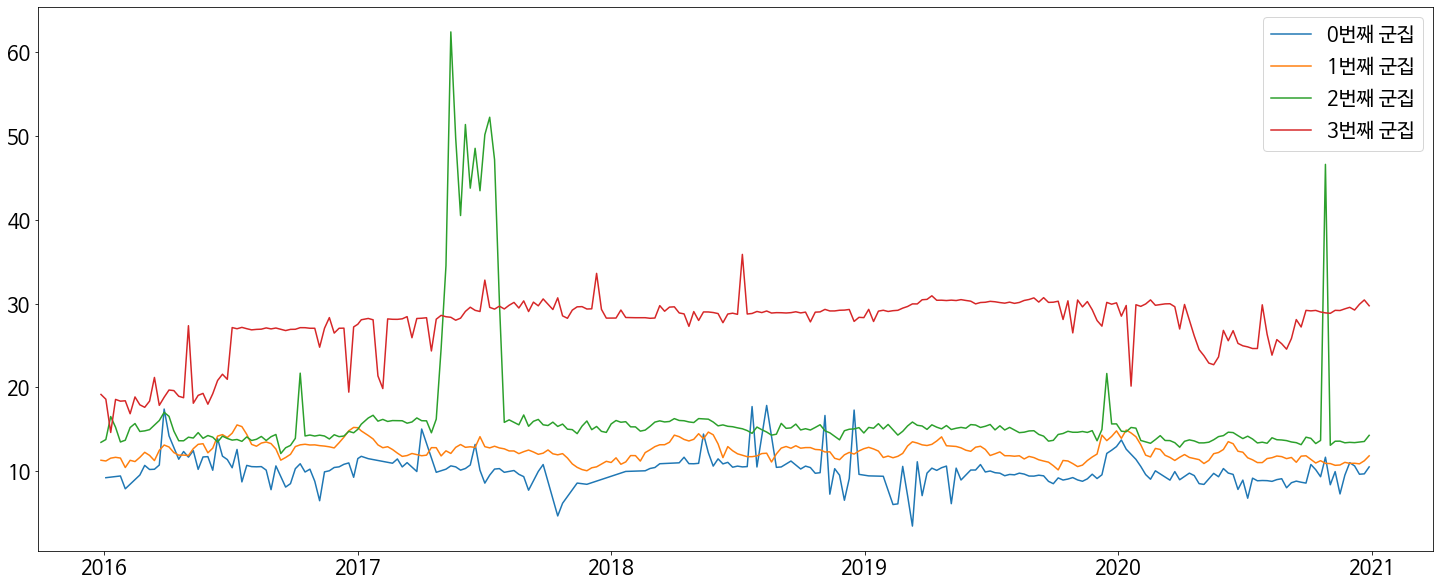

In [ ]:
## 시각화
fig = plt.figure(figsize = (25, 10))

plt.plot(train_data_salmon_cluster[train_data_salmon_cluster['km_cluster_C_P_I']==0]['P_PRICE'],label='0번째 군집')
plt.plot(train_data_salmon_cluster[train_data_salmon_cluster['km_cluster_C_P_I']==1]['P_PRICE'],label='1번째 군집')
plt.plot(train_data_salmon_cluster[train_data_salmon_cluster['km_cluster_C_P_I']==2]['P_PRICE'],label='2번째 군집')
plt.plot(train_data_salmon_cluster[train_data_salmon_cluster['km_cluster_C_P_I']==3]['P_PRICE'],label='3번째 군집')


plt.legend(loc='best')
plt.show()

흰다리 새우 실루엣 검증

In [ ]:
## 실루엣 계수 사용을 위해 라벨인코딩
train_data_white_shrimp['sil_squid'] = le.fit_transform(train_data_white_shrimp['ctry_purpose_import_type'].values)

## 불필요한 열 제거
train_data_white_shrimp_sil = train_data_white_shrimp.drop(columns=['REG_DATE', 'CTRY_1', 'P_PURPOSE', 'P_NAME', 'P_IMPORT_TYPE','ctry_purpose_import_type'])

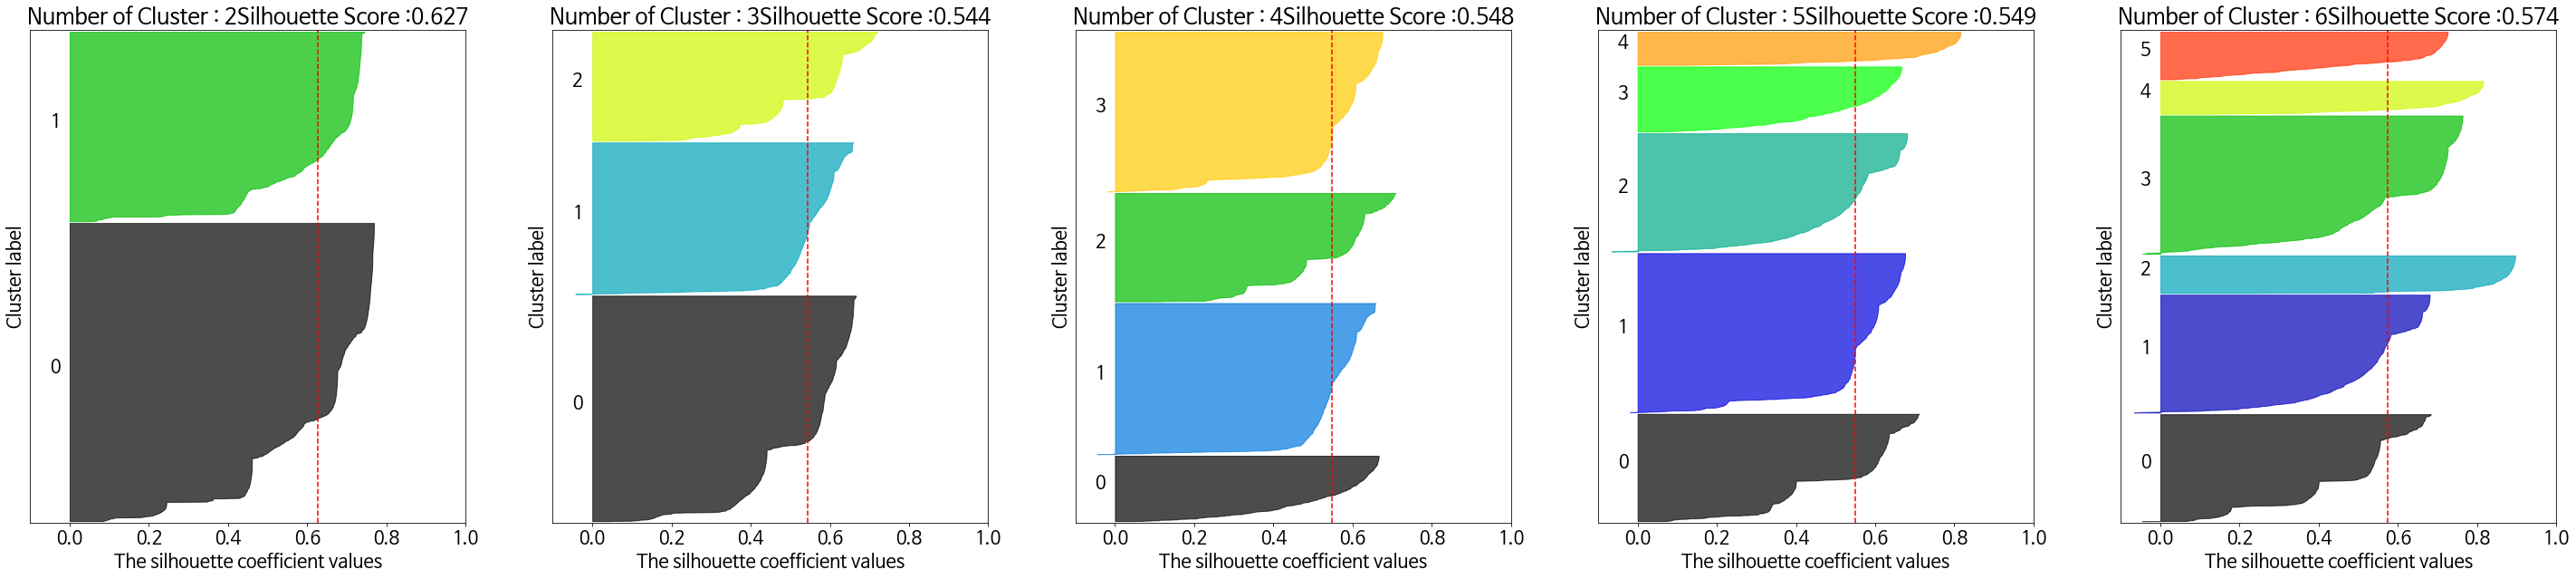

In [ ]:
## 실루엣 계수 시각화
## 흰다리 새우 최적 클러스터 개수는 5개
## 6개로 클러스터링 하면 실루엣계수는 높지만 0번 클러스터, 1번클러스터에서 평균값을 못넘는 데이터가 많음

visualize_silhouette([2,3,4,5,6],train_data_white_shrimp_sil)

In [ ]:
## 군집화
def kmeans_data_white_shrimp(input_data):
    df_C_P_I = input_data.groupby(['ctry_purpose_import_type','REG_DATE'])['P_PRICE'].mean().reset_index().pivot('ctry_purpose_import_type','REG_DATE','P_PRICE').reset_index()
    for i in range(len(df_C_P_I)):
        df_C_P_I.iloc[i,1:] = (df_C_P_I.iloc[i,1:] - df_C_P_I.iloc[i,1:].mean())/df_C_P_I.iloc[i,1:].std() 
    df_C_P_I.fillna(0,inplace=True)
    kmeans = KMeans(n_clusters=5, random_state = 7857)
    km_cluster = kmeans.fit_predict(df_C_P_I.iloc[:,1:])
    
    df_C_P_I_clust = df_C_P_I.copy()
    df_C_P_I_clust['km_cluster_C_P_I'] = km_cluster

    input_data=input_data.merge(df_C_P_I_clust[['ctry_purpose_import_type','km_cluster_C_P_I']],on='ctry_purpose_import_type', how='left')

    return input_data


In [ ]:
## 흰다리새우 Kmeans 실행
train_data_white_shrimp=kmeans_data_white_shrimp(train_data_white_shrimp) 

## 흰다리 새우 시각화 준비
train_data_white_shrimp_cluster=train_data_white_shrimp.groupby(['REG_DATE','km_cluster_C_P_I'])['P_PRICE'].mean().reset_index()
train_data_white_shrimp_cluster.index=train_data_white_shrimp_cluster['REG_DATE']

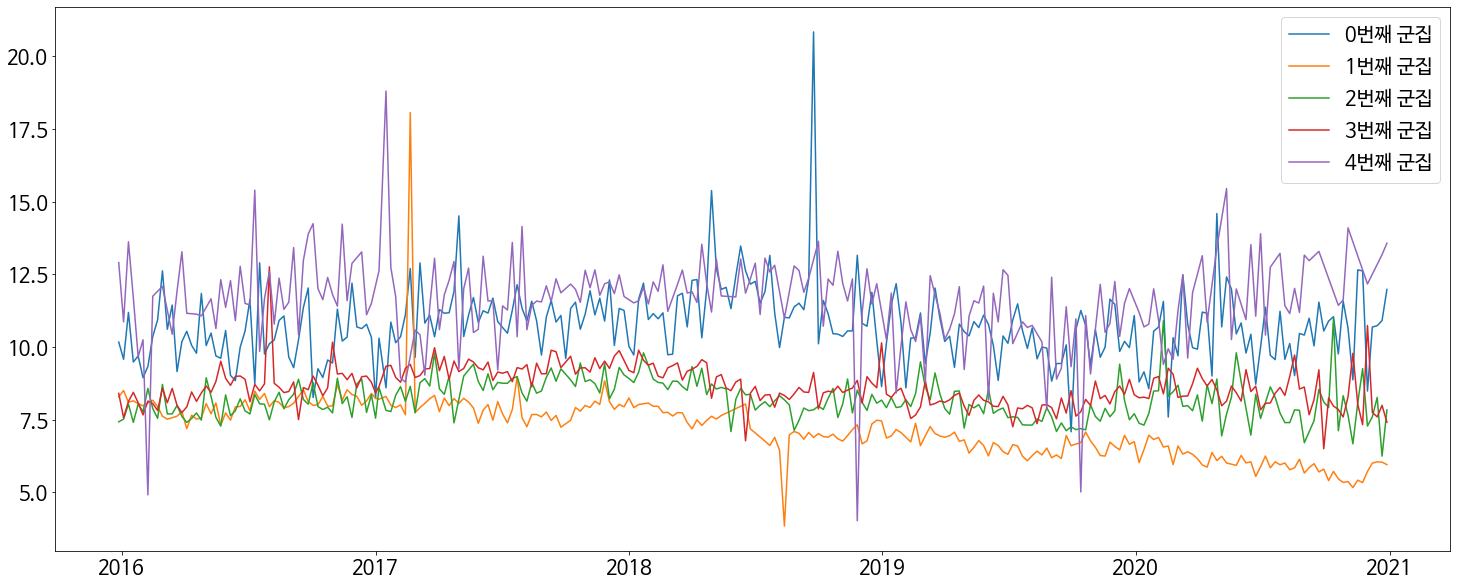

In [ ]:
fig = plt.figure(figsize = (25, 10))

plt.plot(train_data_white_shrimp_cluster[train_data_white_shrimp_cluster['km_cluster_C_P_I']==0]['P_PRICE'],label='0번째 군집')
plt.plot(train_data_white_shrimp_cluster[train_data_white_shrimp_cluster['km_cluster_C_P_I']==1]['P_PRICE'],label='1번째 군집')
plt.plot(train_data_white_shrimp_cluster[train_data_white_shrimp_cluster['km_cluster_C_P_I']==2]['P_PRICE'],label='2번째 군집')
plt.plot(train_data_white_shrimp_cluster[train_data_white_shrimp_cluster['km_cluster_C_P_I']==3]['P_PRICE'],label='3번째 군집')
plt.plot(train_data_white_shrimp_cluster[train_data_white_shrimp_cluster['km_cluster_C_P_I']==4]['P_PRICE'],label='4번째 군집')


plt.legend(loc='best')
plt.show()

In [ ]:
## 상세어종별로 어떤 클러스터링 몇번씩 나타났는지 피벗 만들기위한 준비
train_data_squid_simple=train_data_squid[['REG_DATE','km_cluster_C_P_I']]
train_data_salmon_simple=train_data_salmon[['REG_DATE','km_cluster_C_P_I']]
train_data_white_shrimp_simple=train_data_white_shrimp[['REG_DATE','km_cluster_C_P_I']]


## 상세어종별 피벗테이블 
## 오징어
train_data_squid_melt=train_data_squid_simple.melt(id_vars='REG_DATE')
train_data_squid_melt['var_name']=train_data_squid_melt.apply(lambda x : x['variable']+'_'+str(x['value']),axis=1)
train_data_squid_pivot=pd.pivot_table(train_data_squid_melt,index='REG_DATE',columns='var_name',values=['value'],aggfunc=['count'],fill_value=0)
columns=[i[2] for i in train_data_squid_pivot.columns]
train_data_squid_pivot.columns=columns
train_data_squid_pivot.reset_index(inplace=True)

## 연어  train_data_salmon
train_data_salmon_melt=train_data_salmon_simple.melt(id_vars='REG_DATE')
train_data_salmon_melt['var_name']=train_data_salmon_melt.apply(lambda x : x['variable']+'_'+str(x['value']),axis=1)
train_data_salmon_pivot=pd.pivot_table(train_data_salmon_melt,index='REG_DATE',columns='var_name',values=['value'],aggfunc=['count'],fill_value=0)
columns=[i[2] for i in train_data_salmon_pivot.columns] ## 멀티 컬럼 제거
train_data_salmon_pivot.columns=columns
train_data_salmon_pivot.reset_index(inplace=True)

##흰다리새우  train_data_white_shrimp
train_data_white_shrimp_melt=train_data_white_shrimp_simple.melt(id_vars='REG_DATE')
train_data_white_shrimp_melt['var_name']=train_data_white_shrimp_melt.apply(lambda x : x['variable']+'_'+str(x['value']),axis=1)
train_data_white_shrimp_pivot=pd.pivot_table(train_data_white_shrimp_melt,index='REG_DATE',columns='var_name',values=['value'],aggfunc=['count'],fill_value=0)
columns=[i[2] for i in train_data_white_shrimp_pivot.columns]
train_data_white_shrimp_pivot.columns=columns
train_data_white_shrimp_pivot.reset_index(inplace=True)

# 4. 2020년 데이터를 통한 모델 성능평가 및 2021년 클러스터링 예측
XGBoost 이용

In [ ]:
## 오징어 2015~2020년도 데이터로 2021년도 클러스터링 빈도 예측했을때 몇번씩 등장할것인지 예측
## 학습데이터로 몇번쨰 전 주를 이용해서 학습시킬껀지 확인
## 13주전이 merror 가장 낮게 나옴 0.355

select_list_colname_squid=['km_cluster_C_P_I_0', 'km_cluster_C_P_I_1','km_cluster_C_P_I_2', 'km_cluster_C_P_I_3']

for input_before_week in range(5,14):
    col_list=select_list_colname_squid
    for i in col_list:
        globals() ['train_data_squid_pivot_{}'.format(i)] = train_data_squid_pivot[['REG_DATE',i]]
        for j in range(1,input_before_week):
            globals() ['train_data_squid_pivot_{}'.format(i)][str(j).zfill(2)+'주전']=train_data_squid_pivot[i].shift(j)
        globals() ['train_data_squid_pivot_{}'.format(i)].dropna(inplace=True)

    list_best_score=[]

    ## 오징어
    for i in tqdm(select_list_colname_squid):
        data=globals()['train_data_squid_pivot_{}'.format(i)].copy()
        data.reset_index(drop=True,inplace=True)

        target=data[i] 
        data.drop('REG_DATE',axis=1,inplace=True)

        len_data=data.shape[0]

        feature_columns = list(data.columns.difference(select_list_colname_squid)) 

        x = data[feature_columns]
        y=target

        x=x.applymap(lambda x : int(x))
        y=y.apply(lambda x : int(x))

        x.reset_index(drop=True,inplace=True)
        y.reset_index(drop=True,inplace=True)

        x_train, x_valid, y_train, y_valid = temporal_train_test_split(x, y, test_size = 0.2) ## 시계열 train, test 분리 20% = 최근 32개 데이터가 test
        
        dtrain=xgb.DMatrix(x_train,label=y_train)
        dvalid=xgb.DMatrix(x_valid,label=y_valid)

        params={'objective':'multi:softmax','eval_metric':'merror','random_state':7857,'num_class':30}

        num_round=500
        watchlist=[(dtrain,'train'),(dvalid,'eval')]
        model=xgb.train(params,dtrain,num_round,evals=watchlist,early_stopping_rounds=20,verbose_eval=0)

        for j in range(0,27):
            dtest=xgb.DMatrix(pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns))
            result=pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns)
            result.insert(0,i,int(np.round(model.predict(dtest),0)))
            data=data.append(result)
            data.reset_index(drop=True,inplace=True)


        globals()['list_cl_{}'.format(i)]=list(data[i].iloc[len_data:].values)

        list_best_score.append(model.best_score)

    print(input_before_week,'주전 변수 있을때 평균 eval-merror:',np.mean(list_best_score))

  0%|          | 0/4 [00:00<?, ?it/s]

5 주전 변수 있을때 평균 eval-merror: 0.35576925


  0%|          | 0/4 [00:00<?, ?it/s]

6 주전 변수 있을때 평균 eval-merror: 0.35784324999999995


  0%|          | 0/4 [00:00<?, ?it/s]

7 주전 변수 있을때 평균 eval-merror: 0.382353


  0%|          | 0/4 [00:00<?, ?it/s]

8 주전 변수 있을때 평균 eval-merror: 0.377451


  0%|          | 0/4 [00:00<?, ?it/s]

9 주전 변수 있을때 평균 eval-merror: 0.39705874999999996


  0%|          | 0/4 [00:00<?, ?it/s]

10 주전 변수 있을때 평균 eval-merror: 0.36764725


  0%|          | 0/4 [00:00<?, ?it/s]

11 주전 변수 있을때 평균 eval-merror: 0.40499999999999997


  0%|          | 0/4 [00:00<?, ?it/s]

12 주전 변수 있을때 평균 eval-merror: 0.415


  0%|          | 0/4 [00:00<?, ?it/s]

13 주전 변수 있을때 평균 eval-merror: 0.355


In [ ]:
## 2021년 오징어 클러스터링 예측
future_squid_cluster=pd.DataFrame({'km_cluster_C_P_I_0':list_cl_km_cluster_C_P_I_0,
                                   'km_cluster_C_P_I_1':list_cl_km_cluster_C_P_I_1,
                                   'km_cluster_C_P_I_2':list_cl_km_cluster_C_P_I_2,
                                   'km_cluster_C_P_I_3':list_cl_km_cluster_C_P_I_3})

In [ ]:
## 연어 15주전 0.145
select_list_colname_salmon=['km_cluster_C_P_I_0', 'km_cluster_C_P_I_1','km_cluster_C_P_I_2', 'km_cluster_C_P_I_3']


# 연어

for input_before_week in range(5,16):
    col_list=select_list_colname_salmon
    for i in col_list:
        globals() ['train_data_salmon_pivot_{}'.format(i)] = train_data_salmon_pivot[['REG_DATE',i]]
        for j in range(1,input_before_week): 
            globals() ['train_data_salmon_pivot_{}'.format(i)][str(j).zfill(2)+'주전']=train_data_salmon_pivot[i].shift(j)
        globals() ['train_data_salmon_pivot_{}'.format(i)].dropna(inplace=True)
    list_best_score=[]

    ## 연어
    for i in tqdm(select_list_colname_salmon):
        data=globals()['train_data_salmon_pivot_{}'.format(i)].copy()
        data.reset_index(drop=True,inplace=True)

        target=data[i] 
        data.drop('REG_DATE',axis=1,inplace=True)

        len_data=data.shape[0]

        feature_columns = list(data.columns.difference(select_list_colname_salmon)) 

        x = data[feature_columns]
        y=target

        x=x.applymap(lambda x : int(x))
        y=y.apply(lambda x : int(x))

        x.reset_index(drop=True,inplace=True)
        y.reset_index(drop=True,inplace=True)

        x_train, x_valid, y_train, y_valid = temporal_train_test_split(x, y, test_size = 0.2)

        dtrain=xgb.DMatrix(x_train,label=y_train)
        dvalid=xgb.DMatrix(x_valid,label=y_valid)

        params={'objective':'multi:softmax','eval_metric':'merror','random_state':7857,'num_class':30}
        
        num_round=500
        watchlist=[(dtrain,'train'),(dvalid,'eval')]
        model=xgb.train(params,dtrain,num_round,evals=watchlist,early_stopping_rounds=20,verbose_eval=0)

        for j in range(0,27):
            dtest=xgb.DMatrix(pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns))
            result=pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns)
            result.insert(0,i,int(np.round(model.predict(dtest),0)))
            data=data.append(result)
            data.reset_index(drop=True,inplace=True)


        globals()['list_cl_{}'.format(i)]=list(data[i].iloc[len_data:].values)

        list_best_score.append(model.best_score)

    print(input_before_week,'주전 변수 있을때 평균 eval-merror:',np.mean(list_best_score))

  0%|          | 0/4 [00:00<?, ?it/s]

5 주전 변수 있을때 평균 eval-merror: 0.17307699999999998


  0%|          | 0/4 [00:00<?, ?it/s]

6 주전 변수 있을때 평균 eval-merror: 0.16346175


  0%|          | 0/4 [00:00<?, ?it/s]

7 주전 변수 있을때 평균 eval-merror: 0.158654


  0%|          | 0/4 [00:00<?, ?it/s]

8 주전 변수 있을때 평균 eval-merror: 0.15196075


  0%|          | 0/4 [00:00<?, ?it/s]

9 주전 변수 있을때 평균 eval-merror: 0.15196075


  0%|          | 0/4 [00:00<?, ?it/s]

10 주전 변수 있을때 평균 eval-merror: 0.1666665


  0%|          | 0/4 [00:00<?, ?it/s]

11 주전 변수 있을때 평균 eval-merror: 0.1666665


  0%|          | 0/4 [00:00<?, ?it/s]

12 주전 변수 있을때 평균 eval-merror: 0.17156849999999998


  0%|          | 0/4 [00:00<?, ?it/s]

13 주전 변수 있을때 평균 eval-merror: 0.15


  0%|          | 0/4 [00:00<?, ?it/s]

14 주전 변수 있을때 평균 eval-merror: 0.155


  0%|          | 0/4 [00:00<?, ?it/s]

15 주전 변수 있을때 평균 eval-merror: 0.145


In [ ]:
future_salmon_cluster=pd.DataFrame({'km_cluster_C_P_I_0':list_cl_km_cluster_C_P_I_0,
                                    'km_cluster_C_P_I_1':list_cl_km_cluster_C_P_I_1,
                                    'km_cluster_C_P_I_2':list_cl_km_cluster_C_P_I_2,
                                    'km_cluster_C_P_I_3':list_cl_km_cluster_C_P_I_3})

In [ ]:
# 흰다리새우 13주전 0.212
select_list_colname_white_shrimp=['km_cluster_C_P_I_0', 'km_cluster_C_P_I_1','km_cluster_C_P_I_2','km_cluster_C_P_I_3','km_cluster_C_P_I_4']



for input_before_week in range(5,14):
    col_list=select_list_colname_white_shrimp
    for i in col_list:
        globals() ['train_data_white_shrimp_pivot_{}'.format(i)] = train_data_white_shrimp_pivot[['REG_DATE',i]]
        for j in range(1,input_before_week):
            globals() ['train_data_white_shrimp_pivot_{}'.format(i)][str(j).zfill(2)+'주전']=train_data_white_shrimp_pivot[i].shift(j)
        globals() ['train_data_white_shrimp_pivot_{}'.format(i)].dropna(inplace=True)
    list_best_score=[]

    
    for i in tqdm(select_list_colname_white_shrimp):
        data=globals()['train_data_white_shrimp_pivot_{}'.format(i)].copy()
        data.reset_index(drop=True,inplace=True)

        target=data[i] 
        data.drop('REG_DATE',axis=1,inplace=True)

        len_data=data.shape[0]

        feature_columns = list(data.columns.difference(select_list_colname_white_shrimp)) 

        x = data[feature_columns]
        y=target

        x=x.applymap(lambda x : int(x))
        y=y.apply(lambda x : int(x))

        x.reset_index(drop=True,inplace=True)
        y.reset_index(drop=True,inplace=True)


        x_train, x_valid, y_train, y_valid = temporal_train_test_split(x, y, test_size = 0.2)

        dtrain=xgb.DMatrix(x_train,label=y_train)
        dvalid=xgb.DMatrix(x_valid,label=y_valid)

        params={'objective':'multi:softmax','eval_metric':'merror','random_state':7857,'num_class':30}
        
        num_round=500
        watchlist=[(dtrain,'train'),(dvalid,'eval')]
        model=xgb.train(params,dtrain,num_round,evals=watchlist,early_stopping_rounds=20,verbose_eval=0)


        for j in range(0,27):
            dtest=xgb.DMatrix(pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns))
            result=pd.DataFrame(data.iloc[-1,:].values[0:-1].reshape(1,-1),columns=feature_columns)
            # result.insert(0,'km_cluster_C_P_I_{}'.format(i),int(np.round(model.predict(dtest),0)))
            result.insert(0,i,int(np.round(model.predict(dtest),0)))
            data=data.append(result)
            data.reset_index(drop=True,inplace=True)


        globals()['list_cl_{}'.format(i)]=list(data[i].iloc[len_data:].values)

        list_best_score.append(model.best_score)

    print(input_before_week,'주전 변수 있을때 평균 eval-merror:',np.mean(list_best_score))

  0%|          | 0/5 [00:00<?, ?it/s]

5 주전 변수 있을때 평균 eval-merror: 0.21923079999999998


  0%|          | 0/5 [00:00<?, ?it/s]

6 주전 변수 있을때 평균 eval-merror: 0.22692299999999999


  0%|          | 0/5 [00:00<?, ?it/s]

7 주전 변수 있을때 평균 eval-merror: 0.22307699999999997


  0%|          | 0/5 [00:00<?, ?it/s]

8 주전 변수 있을때 평균 eval-merror: 0.21960799999999997


  0%|          | 0/5 [00:00<?, ?it/s]

9 주전 변수 있을때 평균 eval-merror: 0.2235296


  0%|          | 0/5 [00:00<?, ?it/s]

10 주전 변수 있을때 평균 eval-merror: 0.2235296


  0%|          | 0/5 [00:00<?, ?it/s]

11 주전 변수 있을때 평균 eval-merror: 0.2235296


  0%|          | 0/5 [00:00<?, ?it/s]

12 주전 변수 있을때 평균 eval-merror: 0.21960799999999997


  0%|          | 0/5 [00:00<?, ?it/s]

13 주전 변수 있을때 평균 eval-merror: 0.21200000000000002


In [ ]:
future_white_shrimp_cluster=pd.DataFrame({'km_cluster_C_P_I_0':list_cl_km_cluster_C_P_I_0,
                                          'km_cluster_C_P_I_1':list_cl_km_cluster_C_P_I_1,
                                          'km_cluster_C_P_I_2':list_cl_km_cluster_C_P_I_2,
                                          'km_cluster_C_P_I_3':list_cl_km_cluster_C_P_I_3,
                                          'km_cluster_C_P_I_4':list_cl_km_cluster_C_P_I_4})

# 5. 외부데이터 전처리

## 환율데이터

In [ ]:
## 환율 데이터 경로
ex_can = './외부데이터/USD_CAD 내역.csv' ## 캐나다
ex_CHL = './외부데이터/USD_CLP 내역.csv' ## 칠레
ex_CH = './외부데이터/USD_CNH 내역.csv' ## 중국
ex_ENG = './외부데이터/USD_GBP 내역.csv' ## 영국
ex_KOR = './외부데이터/USD_KRW 내역.csv' ## 대한민국
ex_MAL = './외부데이터/USD_MYR 내역.csv' ## 말레이시아
ex_NOR = './외부데이터/USD_NOK 내역.csv' ## 노르웨이
ex_PE = './외부데이터/USD_PEN 내역.csv' ## 페루
ex_TH = './외부데이터/USD_THB 내역.csv' ## 태국
ex_VN = './외부데이터/USD_VND 내역.csv' ## 베트남


## 국가별 환율 데이터 불러오기
train_full_data=pd.DataFrame()
ex_CAN=pd.read_csv(ex_can, parse_dates=['날짜'])
ex_CHL=pd.read_csv(ex_CHL, parse_dates=['날짜'])
ex_CH=pd.read_csv(ex_CH, parse_dates=['날짜'])
ex_ENG=pd.read_csv(ex_ENG, parse_dates=['날짜'])
ex_KOR=pd.read_csv(ex_KOR, parse_dates=['날짜'])
ex_MAL=pd.read_csv(ex_MAL, parse_dates=['날짜'])
ex_NOR=pd.read_csv(ex_NOR, parse_dates=['날짜'])
ex_PE=pd.read_csv(ex_PE, parse_dates=['날짜'])
ex_TH=pd.read_csv(ex_TH, parse_dates=['날짜'])
ex_VN=pd.read_csv(ex_VN, parse_dates=['날짜'])

In [ ]:
# 문자열 형태의 날짜 칼럼 datetime 형식으로 변환
def str_to_date(str_1):
     
    str_2 = str_1[:4] + '-' + str_1[6:8]+'-'+str_1[10:12]   # 'YYYY년 MM월 DD일' 형태의 데이터를 'YYYY-MM-DD' 형태로 변환
    
    date_return = datetime.strptime(str_2, '%Y-%m-%d')
    return date_return

# 문자열 형태의 종가 칼럼을 분석에 맞게 float형태로 변환
# 대한민국용
def str_to_float_kor(str_1):
     
    str_2 = str_1[0] +str_1[2:] # O,OOO.OO 형태에서 1000의자리 소수점 제거
    
    rate_return = float(str_2)
    return rate_return

# 베트남용
def str_to_float_vn(str_1):
     
    str_2 = str_1[:2] +str_1[3:] # OO,OOO.OO 형태에서 1000의자리 소수점 제거
    
    rate_return = float(str_2)
    return rate_return  

In [ ]:
## 국가 데이터프레임 이름으로 된 리스트 선언 
ctry = ['ex_CAN','ex_CHL','ex_CH','ex_ENG','ex_KOR','ex_MAL','ex_NOR','ex_PE','ex_TH','ex_VN']    

## 각 국가 데이터프레임의 날짜칼럼 datetime 데이터타입으로 변환
for i in ctry:
  globals() [i]['날짜'] = globals() [i]['날짜'].apply(lambda x: str_to_date(x))

## 종가 칼럼이 문자열로 이루어진 한국과 베트남 데이터프레임에 대해서 문자열 데이터를 float형 데이터로 변환 
ex_KOR['종가'] = ex_KOR['종가'].apply(lambda x: str_to_float_kor(x))
ex_VN['종가'] = ex_VN['종가'].apply(lambda x: str_to_float_vn(x))

## 대한민국데이터의 종가 칼럼을 KRW종가로 변경
ex_KOR.rename(columns={'종가':'KRW종가'},inplace=True)

## 각 데이터에서 불필요한 칼럼(오픈, 고가, 저가. 변동) 제거
for i in ctry:
  globals() [i].drop(columns=['오픈','고가','저가','변동 %'],inplace=True)


# 모델에서 분석할 대한민국을 제외한 나머지 국가들 데이터만 추출
ctry_concat = ['ex_CAN','ex_CHL','ex_CH','ex_ENG','ex_MAL','ex_NOR','ex_PE','ex_TH','ex_VN']

## 기존의 달러대비 환율을 통해 원화대비 환율을 새로 계산한 후 새로운 칼럼으로 생성
for i in ctry_concat:
  globals() [i] = pd.merge(globals()[i],ex_KOR,how='left',left_on='날짜',right_on='날짜')
  globals() [i]['원화대비 환율'+'_'+i[3:]] = globals() [i]['KRW종가']/globals() [i]['종가']

## 유가 데이터

In [ ]:
## 유가 데이터 경로 및 불러오기
oil = './외부데이터/국제유가2021-09-09.csv' ## 유가
oil_price = pd.read_csv(oil, parse_dates=['Date'])

##외부 데이터 전처리 작업

In [ ]:
## 각 어종별 데이터프레임을 따로 생성

## 오징어
## 페루, 칠레, 중국
ctry_squid=['ex_PE','ex_CHL','ex_CH']
for i in ctry_squid:
  globals() [i].drop(columns=['종가','KRW종가'],inplace=True)               # 불필요한 칼럼 제거

## 연어
## 노르웨이, 영국, 캐나다
ctry_salmon=['ex_NOR','ex_ENG','ex_CAN']
for i in ctry_salmon:
  globals() [i].drop(columns=['종가','KRW종가'],inplace=True)               # 불필요한 칼럼 제거

## 흰다리새우
## 베트남, 태국, 말레이시아
ctry_white_shrimp=['ex_VN','ex_TH','ex_MAL']
for i in ctry_white_shrimp:
  globals() [i].drop(columns=['종가','KRW종가'],inplace=True)               # 불필요한 칼럼 제거


In [ ]:
## 어종에 따라 같은 어종 국가는 하나로 병합

## 오징어 주요 수출국 환율데이터
ex_squid = pd.merge(ex_PE,ex_CHL, how='left',left_on='날짜', right_on='날짜')
ex_squid = pd.merge(ex_squid,ex_CH, how='left',left_on='날짜', right_on='날짜')
ex_squid = pd.merge(ex_squid,ex_KOR, how='left',left_on='날짜', right_on='날짜')

## 연어 주요 수출국 환율데이터
ex_salmon = pd.merge(ex_NOR,ex_ENG, how='left',left_on='날짜', right_on='날짜')
ex_salmon = pd.merge(ex_salmon,ex_CAN, how='left',left_on='날짜', right_on='날짜')
ex_salmon = pd.merge(ex_salmon,ex_KOR, how='left',left_on='날짜', right_on='날짜')


## 흰다리새우 주요 수출국 환율데이터
ex_white_shrimp = pd.merge(ex_VN,ex_TH, how='left',left_on='날짜', right_on='날짜')
ex_white_shrimp = pd.merge(ex_white_shrimp,ex_MAL, how='left',left_on='날짜', right_on='날짜')
ex_white_shrimp = pd.merge(ex_white_shrimp,ex_KOR, how='left',left_on='날짜', right_on='날짜')


In [ ]:
## 오징어
## 오징어 피벗 테이블과 유가데이터 병합
data_squid_oil = pd.merge(train_data_squid_pivot, oil_price, how='left', left_on='REG_DATE', right_on='Date')

## 오징어 피벗 데이블 + 유가 + 환율(오징어 주요 수출국)
data_squid_oil_ex = pd.merge(data_squid_oil, ex_squid, how='left', left_on='REG_DATE', right_on='날짜')


## 연어
## 연어 피벗 테이블과 유가데이터 병합
data_salmon_oil = pd.merge(train_data_salmon_pivot, oil_price, how='left', left_on='REG_DATE', right_on='Date')

## 연어 피벗 데이블 + 유가 + 환율(연어 주요 수출국)
data_salmon_oil_ex = pd.merge(data_salmon_oil, ex_salmon, how='left', left_on='REG_DATE', right_on='날짜')


## 흰다리새우
## 흰다리새우 피벗 테이블과 유가데이터 병합
data_white_shrimp_oil = pd.merge(train_data_white_shrimp_pivot, oil_price, how='left', left_on='REG_DATE', right_on='Date')

## 흰다리새우 피벗 데이블 + 유가 + 환율(연어 주요 수출국)
data_white_shrimp_oil_ex = pd.merge(data_white_shrimp_oil, ex_white_shrimp, how='left', left_on='REG_DATE', right_on='날짜')

In [ ]:
## 각 어종별 데이터에서 REG_DATE를 제외한 datetime 타입 칼럼 제거

data_squid_oil_ex.drop(columns=['Date','날짜'],inplace=True)
data_salmon_oil_ex.drop(columns=['Date','날짜'],inplace=True)
data_white_shrimp_oil_ex.drop(columns=['Date','날짜'],inplace=True)

In [ ]:
## 결측치 처리
data_squid_oil_ex.interpolate(method="pad", inplace=True)
data_salmon_oil_ex.interpolate(method="pad", inplace=True)
data_white_shrimp_oil_ex.interpolate(method="pad", inplace=True)

# 6. 제품별 평균 단가 예측 성능 평가
target data : 2020년도 데이터
성능파악결과 예측 방법론에 문제 없다고 판단하여 2021년도 데이터 예측 진행

In [ ]:
## 가격예측에 맞게 불필요한 열 제거
train_data_squid_cluster_price_grp = train_data_squid.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()
train_data_salmon_cluster_price_grp = train_data_salmon.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()
train_data_white_shrimp_price_grp = train_data_white_shrimp.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()

In [ ]:
## 평가용 데이터 날짜 불러오기
REG_DATE_2021=pd.read_excel('./제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_평가데이터_update_210831.xlsx')
eval=REG_DATE_2021[['일자']]
eval.rename(columns={'일자':'REG_DATE'},inplace=True)

In [ ]:
## 2021년 클러스터링
eval_squid = pd.merge(eval, future_squid_cluster, how='left',left_index=True, right_index=True )
eval_salmon = pd.merge(eval, future_salmon_cluster, how='left',left_index=True, right_index=True )
eval_white_shrimp = pd.merge(eval, future_white_shrimp_cluster, how='left',left_index=True, right_index=True )

In [ ]:
## 유가 및 환율 데이터 연걸
eval_squid_oil = pd.merge(eval_squid, oil_price, how='left',left_on='REG_DATE', right_on='Date') ## 유가
eval_squid_oil_ex = pd.merge(eval_squid_oil, ex_squid, how='left', left_on='REG_DATE', right_on='날짜') ## 환율

eval_salmon_oil = pd.merge(eval_salmon, oil_price, how='left',left_on='REG_DATE', right_on='Date')
eval_salmon_oil_ex = pd.merge(eval_salmon_oil, ex_salmon, how='left', left_on='REG_DATE', right_on='날짜')

eval_white_shrimp_oil = pd.merge(eval_white_shrimp, oil_price, how='left',left_on='REG_DATE', right_on='Date')
eval_white_shrimp_oil_ex = pd.merge(eval_white_shrimp_oil, ex_white_shrimp, how='left', left_on='REG_DATE', right_on='날짜')

eval_squid_oil_ex.drop(columns=['Date','날짜'],inplace=True)
eval_salmon_oil_ex.drop(columns=['Date','날짜'],inplace=True)
eval_white_shrimp_oil_ex.drop(columns=['Date','날짜'],inplace=True)

In [ ]:
## 2015 ~ 2020년도 데이터에 가격 붙이기
train_data_squid_cluster_price_grp = train_data_squid.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()
train_data_salmon_cluster_price_grp = train_data_salmon.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()
train_data_white_shrimp_cluster_price_grp = train_data_white_shrimp.drop(columns=['CTRY_1','P_PURPOSE', 'P_NAME','P_IMPORT_TYPE', 'ctry_purpose_import_type', 'km_cluster_C_P_I','sil_squid']).groupby(['REG_DATE']).mean()

data_squid_oil_ex_price = pd.merge(data_squid_oil_ex, train_data_squid_cluster_price_grp, how='left', left_on='REG_DATE', right_on='REG_DATE')
data_salmon_oil_ex_price = pd.merge(data_salmon_oil_ex, train_data_salmon_cluster_price_grp, how='left', left_on='REG_DATE', right_on='REG_DATE')
data_white_shrimp_oil_ex_price = pd.merge(data_white_shrimp_oil_ex, train_data_white_shrimp_cluster_price_grp, how='left', left_on='REG_DATE', right_on='REG_DATE')


In [ ]:
## 결측치 보간법으로 대체
data_squid_oil_ex_price.interpolate(method="pad", inplace=True)
data_salmon_oil_ex_price.interpolate(method="pad", inplace=True)
data_white_shrimp_oil_ex_price.interpolate(method="pad", inplace=True)

## 가격 예측 모델링

In [ ]:
## mse 계산하는 생성함수
def get_rmse(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    print('RMSE 값:', np.round(rmse,3))
    return rmse

In [ ]:
## 2021년도까지 연결한 데이터에서 2021년도 제거
data_squid_price = pd.concat([data_squid_oil_ex_price, eval_squid_oil_ex], ignore_index=True)
data_salmon_price = pd.concat([data_salmon_oil_ex_price, eval_salmon_oil_ex], ignore_index=True)
data_white_shrimp_price = pd.concat([data_white_shrimp_oil_ex_price, eval_white_shrimp_oil_ex], ignore_index=True)

data_squid_price_test=data_squid_price.copy()
data_salmon_price_test=data_salmon_price.copy()
data_white_shrimp_price_test=data_white_shrimp_price.copy()

data_squid_price.dropna(axis=0,inplace=True)
data_salmon_price.dropna(axis=0,inplace=True)
data_white_shrimp_price.dropna(axis=0,inplace=True)

오징어 가격 예측 성능평가

In [ ]:
## 1주 ~ 12주 전 가격을 각각 하나의 칼럼을 생성하여 저장
for i in range(1,13):
    data_squid_price['{}주전 금액'.format(i)]=data_squid_price['P_PRICE'].shift(i)


rmse_list =[] ## 평균 rmse 계산


## 2020년 이전 데이터는 Train 데이터로
## 2020년 데이터는 Test 데이터로 저장
data_squid_20_train = data_squid_price.head(-52)
data_squid_20_test = data_squid_price.tail(52)

## 2020년 가격 예측 결과를 저장할 P_PRICE_pred
data_squid_20_train['P_PRICE_pred'] = data_squid_20_train['P_PRICE']
data_squid_20_test['P_PRICE_pred'] = np.nan          # 2020년 데이터의 P_PRICE_pred 칼럼은 모두 Null값으로 설정 

# 2020년 데이터를 한 행씩 예측 후 Train 데이터에 연결 후 연결된 새로운 데이터를 바탕으로 다시 예측
for i in tqdm(range(208,260)):            
    test = data_squid_20_test[data_squid_20_test.index == i]
    
    
    X_train = data_squid_20_train.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Train 데이터는 2020년 이전 데이터
    y_train = data_squid_20_train['P_PRICE_pred']
    
    X_test = data_squid_20_test.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Test 데이터는 2020년 데이터
    y_test = data_squid_20_test['P_PRICE']
    
    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.01,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    data_squid_20_test['P_PRICE_pred'] = pred # 예측 결과 값은 P_PRICE_pred 칼럼에 저장
    
    data_squid_20_train = pd.concat([data_squid_20_train, data_squid_20_test])
    rmse=get_rmse(y_test, pred)     
    rmse_list.append(rmse)     # 각 행마다 RMSE 출력

    for i in range(1,13):
        data_squid_20_train['{}주전 금액'.format(i)]=data_squid_20_train['P_PRICE_pred'].shift(i) # 예측된 결과를 토대로 1~12주전 가격 다시 계산



rmse_avg = np.array(rmse_list)
print('평균 RMSE 값은 :',rmse_avg.mean())

  0%|          | 0/52 [00:00<?, ?it/s]

RMSE 값: 0.433
RMSE 값: 0.402
RMSE 값: 0.395
RMSE 값: 0.395
RMSE 값: 0.389
RMSE 값: 0.392
RMSE 값: 0.392
RMSE 값: 0.388
RMSE 값: 0.387
RMSE 값: 0.387
RMSE 값: 0.387
RMSE 값: 0.385
RMSE 값: 0.382
RMSE 값: 0.381
RMSE 값: 0.383
RMSE 값: 0.385
RMSE 값: 0.387
RMSE 값: 0.389
RMSE 값: 0.387
RMSE 값: 0.39
RMSE 값: 0.389
RMSE 값: 0.39
RMSE 값: 0.39
RMSE 값: 0.389
RMSE 값: 0.389
RMSE 값: 0.39
RMSE 값: 0.392
RMSE 값: 0.392
RMSE 값: 0.39
RMSE 값: 0.389
RMSE 값: 0.39
RMSE 값: 0.388
RMSE 값: 0.387
RMSE 값: 0.388
RMSE 값: 0.39
RMSE 값: 0.387
RMSE 값: 0.388
RMSE 값: 0.387
RMSE 값: 0.386
RMSE 값: 0.386
RMSE 값: 0.387
RMSE 값: 0.386
RMSE 값: 0.385
RMSE 값: 0.385
RMSE 값: 0.385
RMSE 값: 0.384
RMSE 값: 0.384
RMSE 값: 0.381
RMSE 값: 0.382
RMSE 값: 0.382
RMSE 값: 0.383
RMSE 값: 0.381
평균 RMSE 값은 : 0.38840084559169574


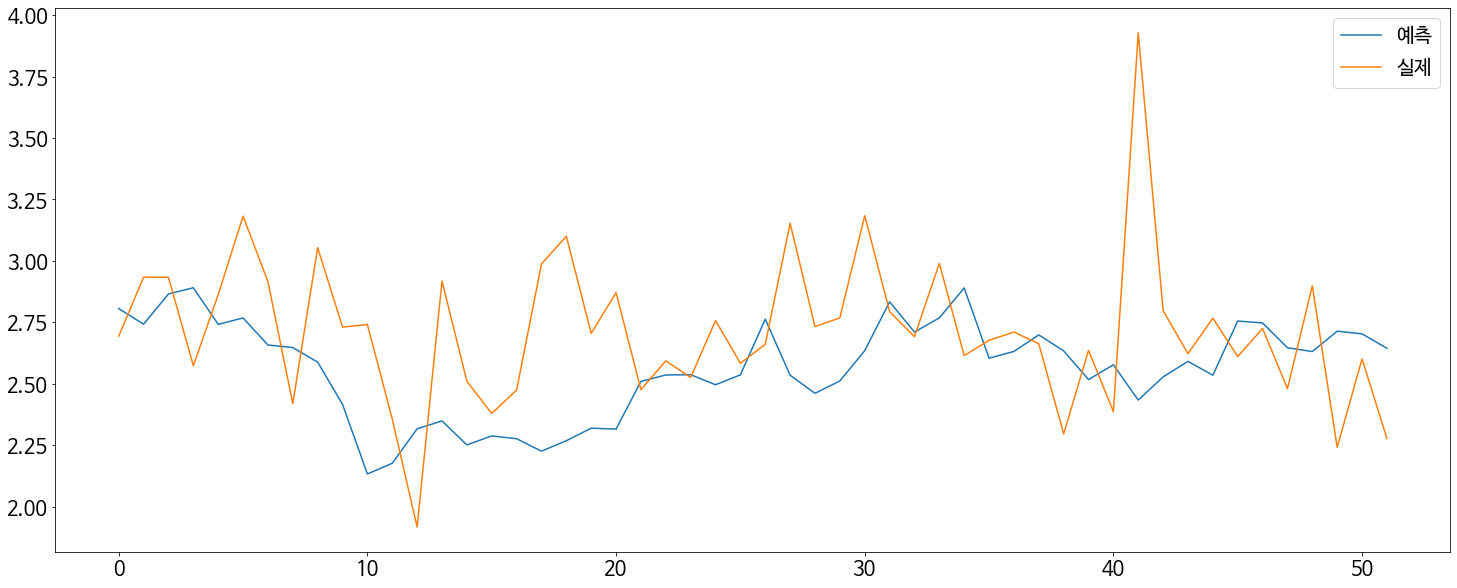

In [ ]:
## 시각화
fig = plt.figure(figsize = (25, 10))

plt.plot(my_model.predict(X_test),label='예측')
plt.plot(y_test.values,label='실제')

plt.legend(loc='best')
plt.show()


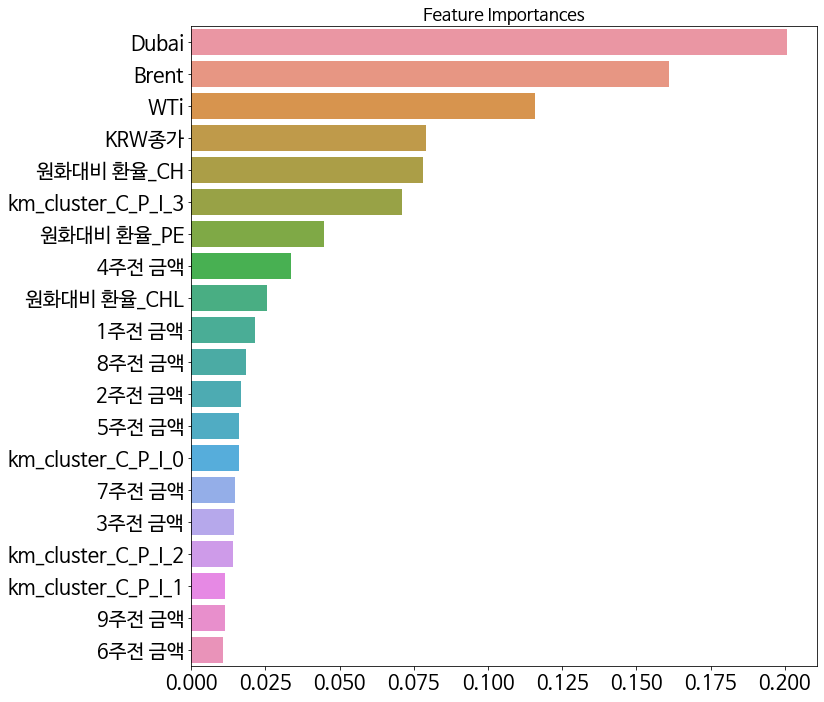

In [ ]:
## 중요도 파악
## 외부데이터가 중요한것으로 판단
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 

    # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
    ftr_top20 = get_top_features(models)
    plt.title('Feature Importances',size=17)
    sns.barplot(x=ftr_top20.values, y=ftr_top20.index ) # , ax=axs[1]


visualize_ftr_importances(my_model)

연어 가격 예측 성능평가

In [ ]:

## 1주 ~ 12주 전 가격을 각각 하나의 칼럼을 생성하여 저장
for i in range(1,13):
    data_salmon_price['{}주전 금액'.format(i)]=data_salmon_price['P_PRICE'].shift(i)

rmse_list =[]

## 2020년 이전 데이터는 Train 데이터로
## 2020년 데이터는 Test 데이터로 저장
data_salmon_20_train = data_salmon_price.head(-50)
data_salmon_20_test = data_salmon_price.tail(50)

## 2020년 가격 예측 결과를 저장할 P_PRICE_pred
data_salmon_20_train['P_PRICE_pred'] = data_salmon_20_train['P_PRICE']
data_salmon_20_test['P_PRICE_pred'] = np.nan          # 2020년 데이터의 P_PRICE_pred 칼럼은 모두 Null값으로 설정 

# 2020년 데이터를 한 행씩 예측 후 Train 데이터에 연결 후 연결된 새로운 데이터를 바탕으로 다시 예측
for i in tqdm(range(210,260)):            
    test = data_salmon_20_test[data_salmon_20_test.index == i]
    
    
    X_train = data_salmon_20_train.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Train 데이터는 2020년 이전 데이터
    y_train = data_salmon_20_train['P_PRICE_pred']
    
    X_test = data_salmon_20_test.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Test 데이터는 2020년 데이터
    y_test = data_salmon_20_test['P_PRICE']
    
    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.01,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    data_salmon_20_test['P_PRICE_pred'] = pred # 예측 결과 값은 P_PRICE_pred 칼럼에 저장
    
    data_salmon_20_train = pd.concat([data_salmon_20_train, data_salmon_20_test])
    rmse=get_rmse(y_test, pred)     
    rmse_list.append(rmse)  # 각 행마다 RMSE 출력  

    for i in range(1,13):
        data_salmon_20_train['{}주전 금액'.format(i)]=data_salmon_20_train['P_PRICE_pred'].shift(i) # 예측된 결과를 토대로 1~12주전 가격 다시 계산

rmse_avg = np.array(rmse_list)
print('평균 RMSE 값은 :',rmse_avg.mean())

  0%|          | 0/50 [00:00<?, ?it/s]

RMSE 값: 1.14
RMSE 값: 1.196
RMSE 값: 1.214
RMSE 값: 1.236
RMSE 값: 1.249
RMSE 값: 1.246
RMSE 값: 1.241
RMSE 값: 1.256
RMSE 값: 1.246
RMSE 값: 1.261
RMSE 값: 1.245
RMSE 값: 1.251
RMSE 값: 1.245
RMSE 값: 1.254
RMSE 값: 1.26
RMSE 값: 1.274
RMSE 값: 1.27
RMSE 값: 1.269
RMSE 값: 1.268
RMSE 값: 1.276
RMSE 값: 1.284
RMSE 값: 1.286
RMSE 값: 1.283
RMSE 값: 1.289
RMSE 값: 1.297
RMSE 값: 1.299
RMSE 값: 1.29
RMSE 값: 1.293
RMSE 값: 1.288
RMSE 값: 1.289
RMSE 값: 1.292
RMSE 값: 1.299
RMSE 값: 1.3
RMSE 값: 1.3
RMSE 값: 1.31
RMSE 값: 1.302
RMSE 값: 1.309
RMSE 값: 1.306
RMSE 값: 1.293
RMSE 값: 1.287
RMSE 값: 1.296
RMSE 값: 1.298
RMSE 값: 1.298
RMSE 값: 1.297
RMSE 값: 1.3
RMSE 값: 1.295
RMSE 값: 1.301
RMSE 값: 1.297
RMSE 값: 1.301
RMSE 값: 1.301
평균 RMSE 값은 : 1.2755526715036338


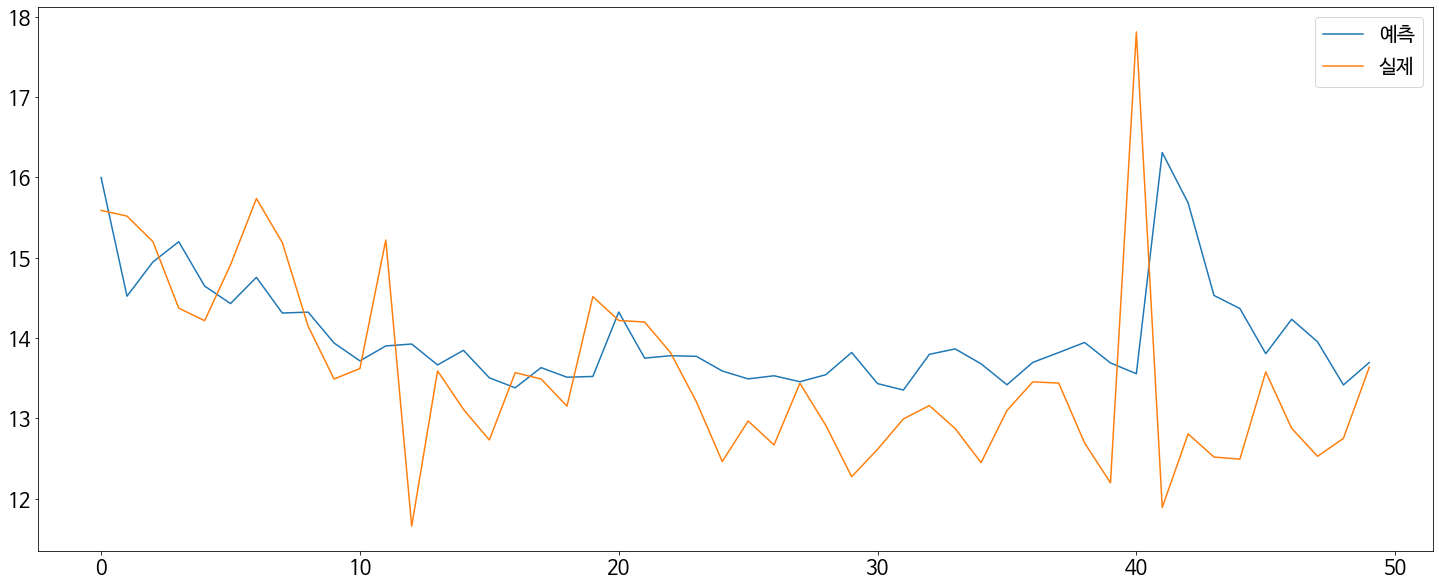

In [ ]:
fig = plt.figure(figsize = (25, 10))

plt.plot(my_model.predict(X_test),label='예측')
plt.plot(y_test.values,label='실제')

plt.legend(loc='best')
plt.show()


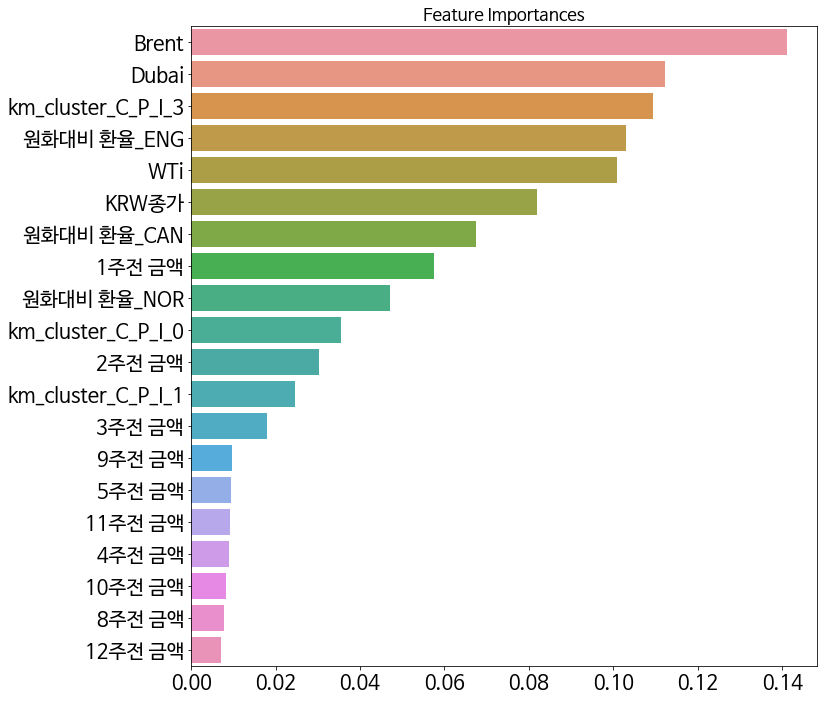

In [ ]:
visualize_ftr_importances(my_model)

흰다리새우 가격 예측 성능평가

In [ ]:
## 1주 ~ 12주 전 가격을 각각 하나의 칼럼을 생성하여 저장
for i in range(1,13):
    data_white_shrimp_price['{}주전 금액'.format(i)]=data_white_shrimp_price['P_PRICE'].shift(i)

rmse_list =[]

## 2020년 이전 데이터는 Train 데이터로
## 2020년 데이터는 Test 데이터로 저장
data_white_shrimp_20_train = data_white_shrimp_price.head(-50)
data_white_shrimp_20_test = data_white_shrimp_price.tail(50)

## 2020년 가격 예측 결과를 저장할 P_PRICE_pred
data_white_shrimp_20_train['P_PRICE_pred'] = data_white_shrimp_20_train['P_PRICE']
data_white_shrimp_20_test['P_PRICE_pred'] = np.nan # 2020년 데이터의 P_PRICE_pred 칼럼은 모두 Null값으로 설정 

# 2020년 데이터를 한 행씩 예측 후 Train 데이터에 연결 후 연결된 새로운 데이터를 바탕으로 다시 예측
for i in tqdm(range(210,260)):            
    test = data_white_shrimp_20_test[data_white_shrimp_20_test.index == i]
    
    
    X_train = data_white_shrimp_20_train.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Train 데이터는 2020년 이전 데이터
    y_train = data_white_shrimp_20_train['P_PRICE_pred']
    
    X_test = data_white_shrimp_20_test.drop(['P_PRICE','REG_DATE','P_PRICE_pred'], axis=1, inplace=False) # Test 데이터는 2020년 데이터
    y_test = data_white_shrimp_20_test['P_PRICE']
    
    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.01,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    data_white_shrimp_20_test['P_PRICE_pred'] = pred # 예측 결과 값은 P_PRICE_pred 칼럼에 저장
    
    data_white_shrimp_20_train = pd.concat([data_white_shrimp_20_train, data_white_shrimp_20_test])
    rmse=get_rmse(y_test, pred)     
    rmse_list.append(rmse)     # 각 행마다 RMSE 출력

    for i in range(1,13):
        data_white_shrimp_20_train['{}주전 금액'.format(i)]=data_white_shrimp_20_train['P_PRICE_pred'].shift(i) # 예측된 결과를 토대로 1~12주전 가격 다시 계산


rmse_avg = np.array(rmse_list)
print('평균 RMSE 값은 :',rmse_avg.mean())

  0%|          | 0/50 [00:00<?, ?it/s]

RMSE 값: 0.853
RMSE 값: 0.845
RMSE 값: 0.847
RMSE 값: 0.849
RMSE 값: 0.847
RMSE 값: 0.842
RMSE 값: 0.848
RMSE 값: 0.847
RMSE 값: 0.855
RMSE 값: 0.854
RMSE 값: 0.852
RMSE 값: 0.853
RMSE 값: 0.853
RMSE 값: 0.853
RMSE 값: 0.848
RMSE 값: 0.846
RMSE 값: 0.844
RMSE 값: 0.846
RMSE 값: 0.844
RMSE 값: 0.845
RMSE 값: 0.843
RMSE 값: 0.847
RMSE 값: 0.846
RMSE 값: 0.847
RMSE 값: 0.848
RMSE 값: 0.846
RMSE 값: 0.85
RMSE 값: 0.846
RMSE 값: 0.849
RMSE 값: 0.847
RMSE 값: 0.849
RMSE 값: 0.851
RMSE 값: 0.85
RMSE 값: 0.844
RMSE 값: 0.845
RMSE 값: 0.846
RMSE 값: 0.849
RMSE 값: 0.845
RMSE 값: 0.843
RMSE 값: 0.841
RMSE 값: 0.843
RMSE 값: 0.842
RMSE 값: 0.842
RMSE 값: 0.841
RMSE 값: 0.842
RMSE 값: 0.838
RMSE 값: 0.838
RMSE 값: 0.839
RMSE 값: 0.839
RMSE 값: 0.838
평균 RMSE 값은 : 0.846036879425865


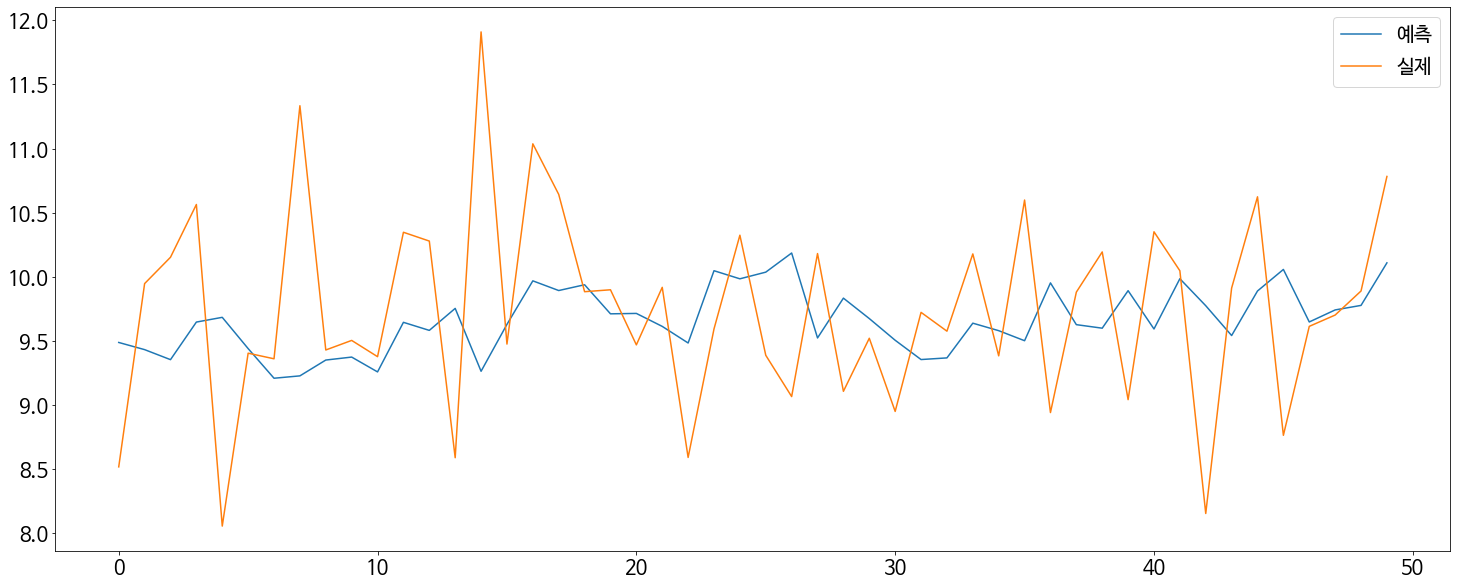

In [ ]:
fig = plt.figure(figsize = (25, 10))

plt.plot(my_model.predict(X_test),label='예측')
plt.plot(y_test.values,label='실제')

plt.legend(loc='best')
plt.show()


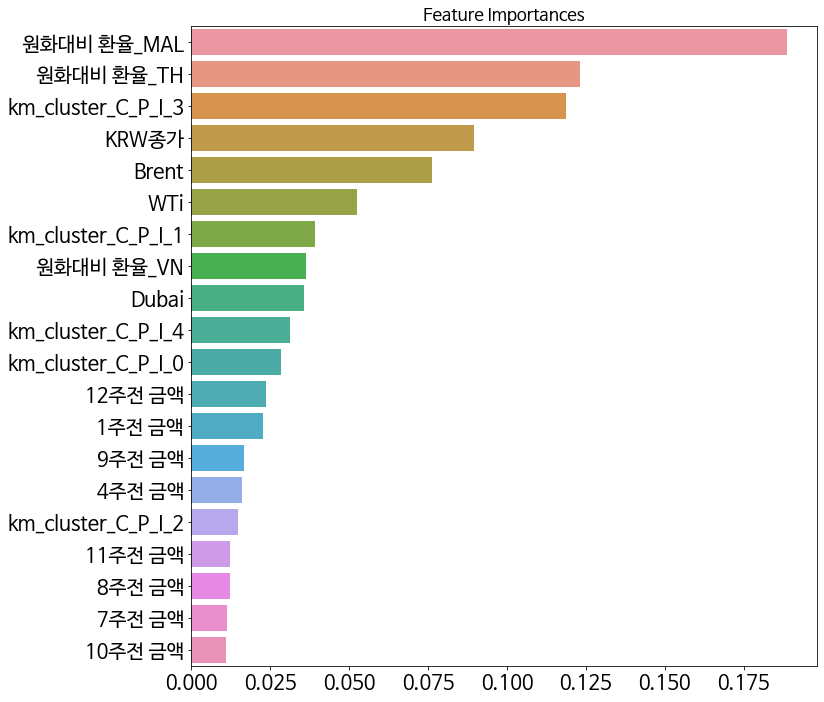

In [ ]:
visualize_ftr_importances(my_model)

# 7. 2021년도 예측
위의 방법을 이용해서 2020년 까지 데이터로 2021년 예측

In [ ]:
## 12주전 까지 데이터 생성

## 오징어
for i in range(1,13):
    data_squid_price_test['{}주전 금액'.format(i)]=data_squid_price_test['P_PRICE'].shift(i)

## 연어
for i in range(1,13):
    data_salmon_price_test['{}주전 금액'.format(i)]=data_salmon_price_test['P_PRICE'].shift(i)

## 흰다리새우
for i in range(1,13):
    data_white_shrimp_price_test['{}주전 금액'.format(i)]=data_white_shrimp_price_test['P_PRICE'].shift(i)

In [ ]:
## 2021년은 타겟 데이터
data_squid_test = data_squid_price_test.iloc[260:]
data_salmon_test = data_salmon_price_test.iloc[260:]
data_white_shrimp_test = data_white_shrimp_price_test.iloc[260:]

## 2021년 이전은 훈련 데이터
data_squid_train = data_squid_price_test.iloc[:260]
data_salmon_train = data_salmon_price_test.iloc[:260]
data_white_shrimp_train = data_white_shrimp_price_test.iloc[:260]


# 훈련데이터에서 1~12주 전의 데이터가 없는 행은 제거
data_squid = data_squid_train.dropna()
data_salmon = data_salmon_train.dropna()
data_white_shrimp = data_white_shrimp_train.dropna()

In [ ]:
## 2021년 오징어 가격 예측

for i in tqdm(range(260,286)):
    test = data_squid_test[data_squid_test.index == i]
    
    y_train = data_squid['P_PRICE']
    X_train = data_squid.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)
    X_test = test.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)

    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.001,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    test['P_PRICE'] = pred
    
    data_squid = pd.concat([data_squid, test])
    
    for i in range(1,13):
        data_squid['{}주전 금액'.format(i)]=data_squid['P_PRICE'].shift(i)
    

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
## 2021년 연어 가격 예측

for i in tqdm(range(262,288)):
    test = data_salmon_test[data_salmon_test.index == i]
    
    y_train = data_salmon['P_PRICE']
    X_train = data_salmon.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)
    X_test = test.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)

    
    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.001,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    test['P_PRICE'] = pred
    
    data_salmon = pd.concat([data_salmon, test])
    
    for i in range(1,13):
        data_salmon['{}주전 금액'.format(i)]=data_salmon['P_PRICE'].shift(i)
    

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
## 2021년 흰다리새우 가격 예측

for i in tqdm(range(262,288)):
    test = data_white_shrimp_test[data_white_shrimp_test.index == i]
    
    y_train = data_white_shrimp['P_PRICE']
    X_train = data_white_shrimp.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)
    X_test = test.drop(['P_PRICE','REG_DATE'], axis=1, inplace=False)

    
    my_model = XGBRegressor(n_estimators=10000,learning_rate=0.001,seed=7857,max_depth=30,colsample_bytree=0.2,objective='reg:squarederror')
    my_model.fit(X_train, y_train,  verbose=False)
    pred = my_model.predict(X_test)
    test['P_PRICE'] = pred
    
    data_white_shrimp = pd.concat([data_white_shrimp, test])
    
    for i in range(1,13):
        data_white_shrimp['{}주전 금액'.format(i)]=data_white_shrimp['P_PRICE'].shift(i)
    

  0%|          | 0/26 [00:00<?, ?it/s]

# 8. 최종결과물

In [ ]:
sub_data_squid=data_squid[['REG_DATE','P_PRICE']].tail(26)
sub_data_squid.reset_index(drop=True,inplace=True)
sub_data_squid.to_excel('/content/drive/MyDrive/TAVE_빅콘테스트/제출데이터/2021_오징어_단가예측.xlsx',index=False)

In [ ]:
sub_data_salmon=data_salmon[['REG_DATE','P_PRICE']].tail(26)
sub_data_salmon.reset_index(drop=True,inplace=True)
sub_data_salmon.to_excel('/content/drive/MyDrive/TAVE_빅콘테스트/제출데이터/2021_연어_단가예측.xlsx',index=False)

In [ ]:
sub_data_white_shrimp=data_white_shrimp[['REG_DATE','P_PRICE']].tail(26)
sub_data_white_shrimp.reset_index(drop=True,inplace=True)
sub_data_white_shrimp.to_excel('/content/drive/MyDrive/TAVE_빅콘테스트/제출데이터/2021_흰다리새우_단가예측.xlsx',index=False)